## Kamil Pieprzycki


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


model = VGG16(weights='imagenet', include_top=True) #Load alredy pre-trained model
model.summary() #Print a list of layers with all the details

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

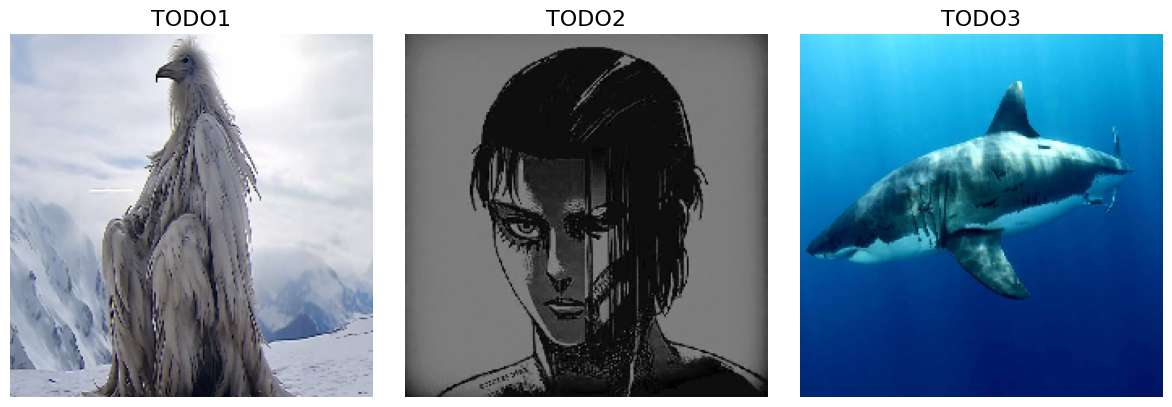

In [ ]:
#Further on, each time you will need to complete the code, it will be marked by #TODO

# Assign image titles for your images
image_titles = ['TODO1', 'TODO2', 'TODO3']

# Load images and reshape them
img1 = load_img('1.jpg', target_size=(224, 224))
img2 =  load_img('eren.jpg', target_size=(224, 224))
img3 =  load_img('greatshark.jpg', target_size=(224, 224))
#We resize the images into size 224 x 224, as the model prefers those sizes. However, if your images are smaller, you can change those values a little bit.
#  print(img1)
# Convert them to a Numpy array
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# # Preparing input data for VGG16
X = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds = model.predict(X)#TODO feed images into the network and see the results (use "predict" function)
best_class = np.argmax(preds, axis=1)#TODO find the best class (use argmax or argsort function)

print('Predicted:', decode_predictions(preds, top=3)[0]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label


1/1 [==============================] - 3s 3s/step
Predicted: [('n02105505', 'komondor', 0.18523449), ('n04367480', 'swab', 0.12934805), ('n03388043', 'fountain', 0.1236912)]


In [ ]:
pip install tf_keras_vis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [ ]:
def visualise_heatmap(map):
  f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
  for i, title in enumerate(image_titles):
      heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
      ax[i].set_title(title, fontsize=16)
      ax[i].imshow(images[i])
      ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
      ax[i].axis('off')
  plt.tight_layout()
  plt.show()

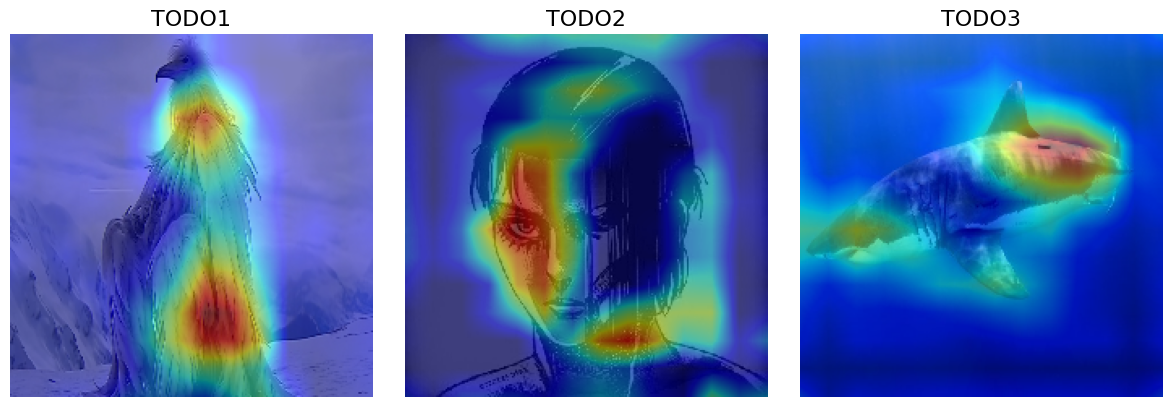

In [ ]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))

gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam)

# Nowa sekcja